<a href="https://colab.research.google.com/github/mini-debug/BOP-IT-Game-ardunio/blob/main/Week_4_MellanieExperiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. ***IMPORTANT ***

**CREATE A LOCAL COPY IN YOUR GOOGLE DRIVE.**

**Select FILE, then Select "Save a Copy in Drive." **

**USE YOUR LOCAL DRIVE COPY TO ENTER DATA and to RUN THE SCRIPT.**

**2. Using your local drive copy of this script, run this section to import the necessary Python libraries.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import optimize
%pylab inline

# this sets the figure format to a vector format
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg')
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

Populating the interactive namespace from numpy and matplotlib


3. **Using your local drive copy of this script, enter your data below and then run the section.**

 Summary: 
 5 data points; chisq min =  3.76 
 chisq min good fit range: 1.84 to 8.16 
 best-fit slope = -1149 +/- 28 
 best-fit intercept = 23988 +/- 356


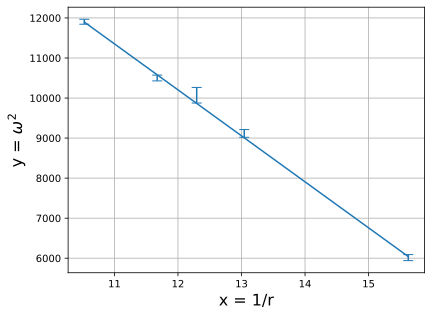

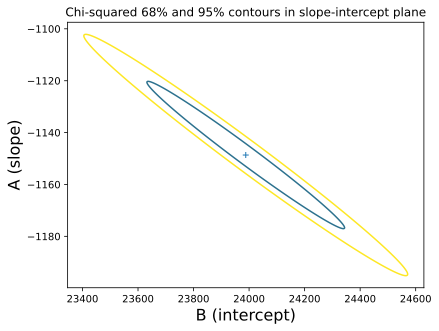

In [ ]:
################################################################
####################### DATA SECTION ###########################
################################################################

# Ball orbital radii
#
# For each of 5 speed control settings, 3 orbital radii measurements are needed.
# Orbital radii should cover a range from 6 cm to around 9.5 cm. DO NOT EXCEED 9.5 cm.
# It is recommended that after you record each orbital radius, record its orbital period (see next section)
# before recording the next orbital radius.
r1 = np.array([0.062, 0.064, 0.066])
r2 = np.array([0.076, 0.077, 0.077])
r3 = np.array([0.094, 0.095, 0.096])
r4 = np.array([0.085, 0.087, 0.085])
r5 = np.array([0.078, 0.084, 0.082])

# Ball orbital periods
#
# At each speed control setting, 3 orbital period measurements are needed, each corresponding to an orbital radius measurement.
# Run the LabQuest app and select the green triangle button to collect data.
# Select a peak near the origin and someone else in your group should record the time displayed in the lower right corner.
# This is the initial time.
# Without removing your finger from the screen, highlight a range of peaks (e.g., 8 or more) and someone in your group should record the final time.
# Calculate the time difference between final and initial times and enter the time difference divided by the number of highlighted time intervals
# (not the number of highlighted peaks).
# For example, in the first entry below, 0.898/11, means 0.898 sec was the time difference and 11 time intervals were highlighted.
# For a group of 3, each person does one orbital radius measurement and one orbital period measurement at each of the 5 speed control settings.
# For groups of 2, one person will need to do two orbital radius measurements and two orbital period measurements.
# NOTE: At each motor speed setting, obtaining three identical orbital period measurements is very unlikely if independently collected.
# If they are identical, you will obtain a divide by 0 error and you should revisit your protocol for collecting orbital period data.
#
T1 = np.array([0.898/11, 0.814/10, 0.800/10])
T2 = np.array([0.798/12, 0.85/13, 0.852/13])
T3 = np.array([0.802/14, 0.866/15, 0.866/15])
T4 = np.array([0.864/14, 0.732/12, 0.796/13])
T5 = np.array([0.766/12, 0.744/12, 0.806/13])

################################################################
############## DO NOT EDIT BELOW THIS LINE #####################
################################################################

# array of orbital radii
r = np.array([mean(r1), mean(r2), mean(r3), mean(r4), mean(r5)])

# Calculate mean angular velocities from period measurements
w1 = 2*pi/mean(T1)
w2 = 2*pi/mean(T2)
w3 = 2*pi/mean(T3)
w4 = 2*pi/mean(T4)
w5 = 2*pi/mean(T5)

# array of angular velocities
w = np.array([w1, w2, w3, w4, w5])

# Standard error of angular velocity (assume all variation is in y-variable)
sigma_w=np.array([np.std(2*pi/T1, ddof=1), np.std(2*pi/T2, ddof=1), np.std(2*pi/T3, ddof=1), np.std(2*pi/T4, ddof=1), np.std(2*pi/T5, ddof=1)]/np.sqrt(np.size(T1)));

# The model (arrays of x, y and standard error of y)
x = 1/r;
y = w**2;
y_se = 2*w*sigma_w;

# calculate sums needed to obtain chi-square
s_yy=sum(y**2/y_se**2)
s_xx=sum(x**2/y_se**2)
s_0=sum(1/y_se**2)
s_xy=sum((y*x)/y_se**2)
s_y=sum(y/y_se**2)
s_x=sum(x/y_se**2)

A_best = (s_0*s_xy - s_x*s_y)/(s_0*s_xx - s_x**2)
sigma_A = 1/sqrt(s_xx);
B_best = (s_y*s_xx - s_x*s_xy)/(s_0*s_xx - s_x**2)
sigma_B = 1/sqrt(s_0);
rho = s_x/sqrt(s_xx*s_0);
minchi2 = (s_0*s_xy**2 - 2*s_x*s_y*s_xy + s_y**2*s_xx)/(s_x**2 - s_0*s_xx) + s_yy

A_delta = sqrt(2.3*sigma_A**2/(1-rho**2));
B_delta = sqrt(2.3*sigma_B**2/(1-rho**2));

# plot data with errorbars
#plt.figure()
plt.figure(facecolor='white')
plt.errorbar(x,y,y_se,linestyle='None',fmt='none',capsize=5)
plt.xlabel('x = 1/r',fontsize=16)
# plt.ylabel('y = $\omega^2$',fontsize=16)
plt.ylabel(r'y = $\omega^2$', fontsize=16)
plt.grid(True)
#plt.title('y vs x data and line-of-best-fit', fontsize=16)
plt.plot(x,A_best*x+B_best);

# create parameter grid
A_interval = sqrt(6.17*sigma_A**2/(1-rho**2));
B_interval = sqrt(6.17*sigma_B**2/(1-rho**2));
a = np.linspace(A_best-1.1*A_interval,A_best+1.1*A_interval,500)
b = np.linspace(B_best-1.1*B_interval,B_best+1.1*B_interval,500)
A,B = np.meshgrid(a,b)

# calculate chi-square over parameter grid
chi2=(s_yy) + (A**2)*(s_xx) + (B**2)*(s_0) - 2*A*s_xy - 2*B*s_y + 2*A*B*s_x

# plot chi-square in A-b parameter plane with 68% and 95% contours
#plt.figure()
plt.figure(facecolor='white')
levels=[minchi2,minchi2+2.3,minchi2+6.17]
Z=plt.contour(B,A,chi2,levels)
plt.xlim(np.min(b),np.max(b))
plt.ylim(np.min(a),np.max(a))
plt.plot(B_best,A_best,'+')
plt.ylabel('A (slope)',fontsize=16)
plt.xlabel('B (intercept)',fontsize=16)
plt.title('Chi-squared 68% and 95% contours in slope-intercept plane');
gf_lower = x.size - np.sqrt(2*x.size)
gf_upper = x.size + np.sqrt(2*x.size)
print(" Summary: \n%2d data points; chisq min =%6.2f \n chisq min good fit range: %3.2f to %3.2f \n best-fit slope = %3.0f +/- %.0f \n best-fit intercept = %3.0f +/- %.0f" %(x.size,minchi2,gf_lower, gf_upper,A_best,A_delta,B_best,B_delta))